In [1]:
from bigraph_viz import plot_bigraph
plot_settings = {'size':'8,5', 'plot_schema': True, 'file_format': 'png'}

## Vivarium basics

Writing out/store


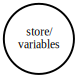

In [16]:
# simple spec
simple_object_spec = {'store/<br/>variables': {}}

# plot
plot_bigraph(simple_object_spec, **plot_settings, out_dir='out' ,filename='store')

Writing out/process


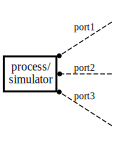

In [17]:
# process spec
process_spec = {
    'process/<br/>simulator': {
        '_ports': {
            'port1': 'type',
            'port2': 'type',
            'port3': 'type'}}}

# plot
plot_settings1 = {'rankdir':'RL', **plot_settings}
plot_bigraph(process_spec, **plot_settings1, out_dir='out', filename='process')

Writing out/composite


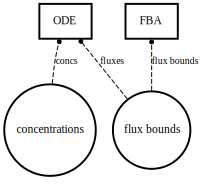

In [4]:
# composite spec
flat_composite_spec = {
    'concentrations': {},
    'flux bounds': {},
    'ODE': {
        '_ports': {'concs': 'type', 'fluxes': 'type',},
        '_wires': {
            'concs': 'concentrations',
            'fluxes': 'flux bounds'}},
    'FBA': {
        '_ports': {'flux bounds': 'type'},
        '_wires': {
            'flux bounds': 'flux bounds'}}}

# plot
plot_settings1 = {'rankdir':'BT', **plot_settings}
plot_bigraph(flat_composite_spec, **plot_settings1, out_dir='out' ,filename='composite')

Writing out/hierarchy


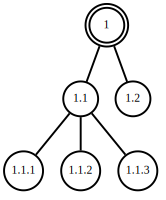

In [5]:
# hierarchy spec
hierarchy = {
    '1': {
        '1.1': {'1.1.1': '',
              '1.1.2': '',
              '1.1.3': ''},
        '1.2': {}}}

# plot
plot_bigraph(hierarchy, **plot_settings, out_dir='out' ,filename='hierarchy')

## Modeling subaim 1

Writing out/aim1


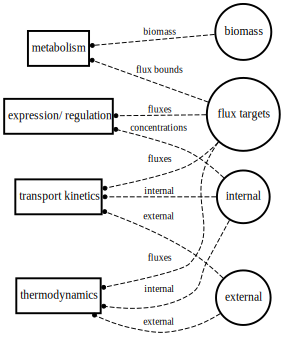

In [6]:
internal_concs = 'internal'
external_concs = 'external'

# aim 1 schema
aim1 = {
    'biomass': {},
    'flux targets': {},
    internal_concs: {},
    external_concs: {},
    'expression/<br/>regulation': {
        '_ports': {'fluxes': '', 'concentrations': ''},
        '_wires': {
            'fluxes': 'flux targets',
            'concentrations': internal_concs
        }
    },
    'transport<br/>kinetics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        '_wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'thermodynamics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        '_wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'metabolism': {
        '_ports': {'flux bounds': '', 'biomass': ''},
        '_wires': {
            'flux bounds': 'flux targets',
            'biomass': 'biomass'}
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(aim1, **plot_settings2, out_dir='out' ,filename='aim1')

Writing out/composition_example


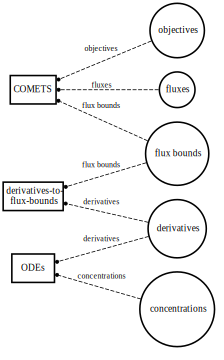

In [18]:
composition_example = {
    'fluxes': {},
    'flux bounds': {},
    'objectives': {},
    'derivatives': {},
    'concentrations': {},
    'COMETS': {
        '_ports': {'fluxes': '', 'objectives': '', 'flux bounds': ''},
        '_wires': {
            'fluxes': 'fluxes',
            'flux bounds': 'flux bounds',
            'objectives': 'objectives'
        }
    },
    'derivatives-to-<br/>flux-bounds': {
        '_ports': {'derivatives': '', 'flux bounds': ''},
        '_wires': {
            'derivatives': 'derivatives',
            'flux bounds': 'flux bounds',
        }
    },
    'ODEs': {
        '_ports': {'derivatives': '', 'concentrations': ''},
        '_wires': {
            'derivatives': 'derivatives',
            'concentrations': 'concentrations'}
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(composition_example, **plot_settings2, out_dir='out' ,filename='composition_example')

## Modeling subaim 2

Writing out/aim2


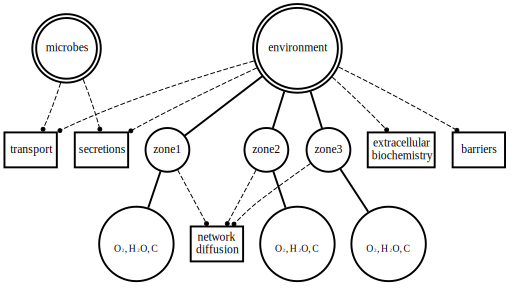

In [24]:
# generic schema
env_schema1 = {
    '_ports': {'': '',}, 
    '_wires': {'': []}}
env_schema2 = {
    '_ports': {'1': '', '2': '', '3': '',},
    '_wires': {
        '1': 'zone1',
        '2': 'zone2',
        '3': 'zone3'}}
exchange_schema = {
     '_ports': {'1': '', '2': '',},
     '_wires': {
         '1': [],
         '2': ['..', 'environment']
     }}
env_layer_schema = {'': {'_value': 
                    '<font point-size="10">'
                    'O<sub><font point-size="5">2</font></sub>, '
                    'H<sub><font point-size="5">2</font></sub>O, '
                    'C<br/>'
                    '</font>'
                   }}

# aim 2 schema
aim2 = {
    'microbes': {
         'transport': exchange_schema,
         'secretions': exchange_schema},
    'environment': {
        'zone1': env_layer_schema,
        'zone2': env_layer_schema,
        'zone3': env_layer_schema,
        'network<br/>diffusion': env_schema2,
        'extracellular<br/>biochemistry': env_schema1,
        'barriers': env_schema1
    }}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('microbes',)]], 
    'invisible_edges': [
        (('microbes',), ('microbes', 'transport')),
        (('microbes',), ('microbes', 'secretions')),
        (('environment',), ('environment', 'network<br/>diffusion')),
        (('environment',), ('environment', 'extracellular<br/>biochemistry')),
        (('environment',), ('environment', 'barriers'))
    ],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim2, **plot_settings2, out_dir='out' ,filename='aim2')

## Modeling subaim 3

node ('environment',) not in graph
Writing out/aim3


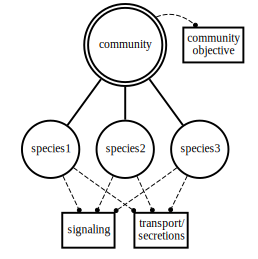

In [26]:
# generic schema
obj_schema = {'_ports': {'1': ''}, '_wires': {'1': []}}
molecular_mechanism_schema = {
            '_ports': {'1': '', '2': '', '3': ''},
            '_wires': {
                '1': 'species1',
                '2': 'species2',
                '3': 'species3'}}

# aim 3 schema
aim3 = {
    'community': {
        'species1': {},
        'species2': {},
        'species3': {},
        'community<br/>objective': {
            '_ports': {'1': ''},
            '_wires': {'1': []}
        },
        'signaling': molecular_mechanism_schema,
        'transport/<br/>secretions': molecular_mechanism_schema
    },
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('community',), ('community', 'community<br/>objective')]], 
    'invisible_edges': [
        (('community',), ('community', 'community<br/>objective')),
        (('community',), ('community', 'signaling')),
        (('community',), ('community', 'transport/<br/>secretions')),
    ],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim3, **plot_settings2, out_dir='out' ,filename='aim3')

## Modeling subaim 4

node ('environment',) not in graph
Writing out/aim4


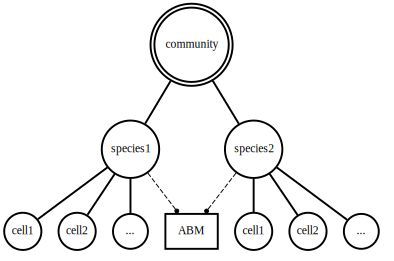

In [10]:
# aim 4 schema
aim4 = {
    'community': {
        'species1': {'cell1': {}, 'cell2': {}, '...': {}},
        'species2': {'cell1': {}, 'cell2': {}, '...': {}},
        'ABM': {
            '_ports': {
                '1': '', 
                '2': '', 
                # 'env': '',
            },
            '_wires': {
                '1': 'species1',
                '2': 'species2',
                # 'env': ['..', '..', 'environment'],
            }}},
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('community',)]], 
    'invisible_edges': [(('community',), ('community', 'ABM'))],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim4, **plot_settings2, out_dir='out' ,filename='aim4')